In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("datasets/train.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   일자              1205 non-null   object 
 1   요일              1205 non-null   object 
 2   본사정원수           1205 non-null   int64  
 3   본사휴가자수          1205 non-null   int64  
 4   본사출장자수          1205 non-null   int64  
 5   본사시간외근무명령서승인건수  1205 non-null   int64  
 6   현본사소속재택근무자수     1205 non-null   float64
 7   조식메뉴            1205 non-null   object 
 8   중식메뉴            1205 non-null   object 
 9   석식메뉴            1205 non-null   object 
 10  중식계             1205 non-null   float64
 11  석식계             1205 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 113.1+ KB


In [4]:
df.describe()

,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식계,석식계
count,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000
mean,2807.815768,157.913693,241.142739,274.117012,43.506224,890.334440,461.772614
std,171.264404,144.190572,43.532298,246.239651,109.937400,209.505057,139.179202
min,2601.000000,23.000000,41.000000,0.000000,0.000000,296.000000,0.000000
25%,2645.000000,71.000000,217.000000,4.000000,0.000000,758.000000,406.000000
50%,2760.000000,105.000000,245.000000,299.000000,0.000000,879.000000,483.000000
75%,2962.000000,185.000000,272.000000,452.000000,0.000000,1032.000000,545.000000
max,3305.000000,1224.000000,378.000000,1044.000000,533.000000,1459.000000,905.000000


# catgorical variable

### 요일

In [5]:
def change_day(x):
    if x == '월':
        return 0
    elif x == '화':
        return 1
    elif x == '수':
        return 2
    elif x == '목':
        return 3
    elif x == '금':
        return 4
    
df['day'] = df['요일'].map(change_day)

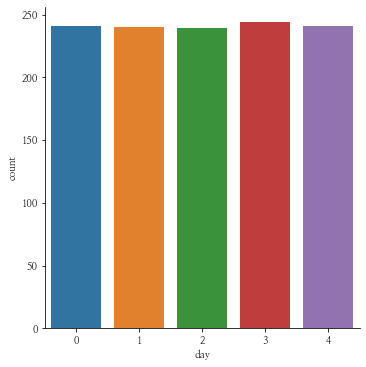

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.catplot(x='day', data=df, kind='count')
plt.show()

### 조식메뉴

In [7]:
df['조식메뉴'].head(2)

0    모닝롤/찐빵  우유/두유/주스 계란후라이  호두죽/쌀밥 (쌀:국내산) 된장찌개  쥐...
1    모닝롤/단호박샌드  우유/두유/주스 계란후라이  팥죽/쌀밥 (쌀:국내산) 호박젓국찌...
Name: 조식메뉴, dtype: object

In [8]:
def split_items(x):
    ret = []
    for item in x.split():
        for c in item.split('/'):
            c = c.strip()
            try:
                if c[0] == '(' and c[-1] == ')':
                    continue
                else:
                     ret.append(c)
            except:
                pass
    return ret

In [9]:
df['morning_menu'] = df['조식메뉴'].map(split_items)

In [10]:
from keras.preprocessing.text import Tokenizer

In [ ]:
tokenizer = Tokenizer()

In [ ]:
tokenizer.fit_on_texts(df['morning_menu'])

In [ ]:
len(tokenizer.index_word)

In [ ]:
sorted(tokenizer.word_counts.items(), key=lambda x: x[1], reverse=True)[:10]

### 중식메뉴

In [11]:
df['lunch_menu'] = df['중식메뉴'].map(split_items)

In [ ]:
t2 = Tokenizer()

In [ ]:
t2.fit_on_texts(df['lunch_menu'])

In [ ]:
len(t2.index_word)

In [ ]:
sorted(t2.word_counts.items(), key=lambda x: x[1], reverse=True)[:10]

### 석식메뉴

In [12]:
df['dinner_menu'] = df['석식메뉴'].map(split_items)

In [ ]:
t3 = Tokenizer()
t3.fit_on_texts(df['dinner_menu'])

In [ ]:
len(t3.index_word)

In [ ]:
sorted(t3.word_counts.items(), key=lambda x: x[1], reverse=True)[:10]

## Quantitative Variable

In [13]:
from matplotlib import rc 
rc('font',family='AppleGothic')

### 본사정원수

<AxesSubplot:ylabel='Frequency'>

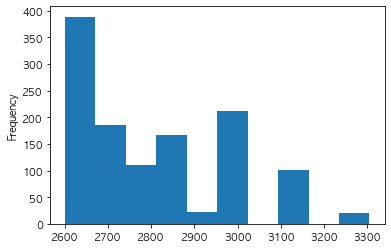

In [14]:
df['본사정원수'].plot(kind='hist')

<AxesSubplot:xlabel='day', ylabel='본사정원수'>

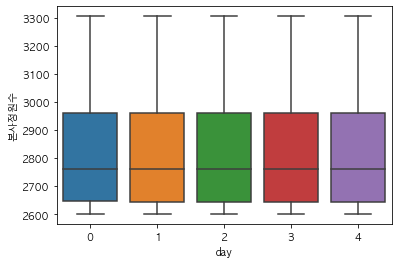

In [15]:
sns.boxplot(x=df['day'], y=df['본사정원수'])

### 본사휴가자수

<AxesSubplot:ylabel='Frequency'>

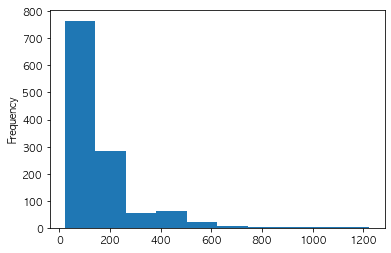

In [16]:
df['본사휴가자수'].plot(kind='hist')

<AxesSubplot:xlabel='day', ylabel='본사휴가자수'>

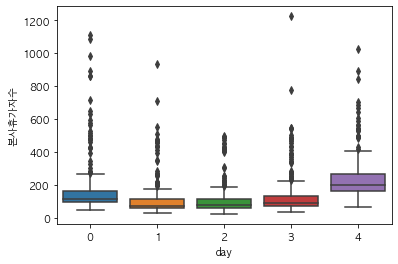

In [17]:
sns.boxplot(x=df['day'], y=df['본사휴가자수'])

### 본사출장자수

<AxesSubplot:ylabel='Frequency'>

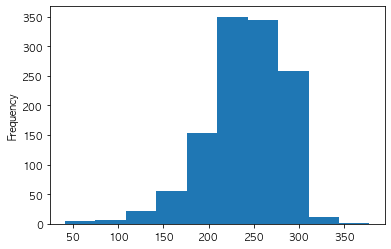

In [18]:
df['본사출장자수'].plot(kind='hist')

<AxesSubplot:xlabel='day', ylabel='본사출장자수'>

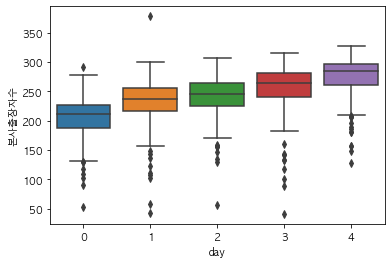

In [19]:
sns.boxplot(x=df['day'], y=df['본사출장자수'])

### 본사시간외근무명령서승인건수

<AxesSubplot:ylabel='Frequency'>

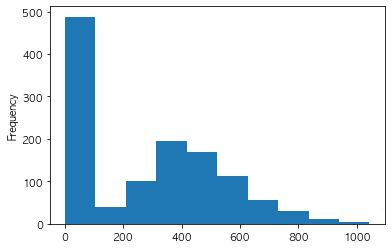

In [20]:
df['본사시간외근무명령서승인건수'].plot(kind='hist')

<AxesSubplot:xlabel='day', ylabel='본사시간외근무명령서승인건수'>

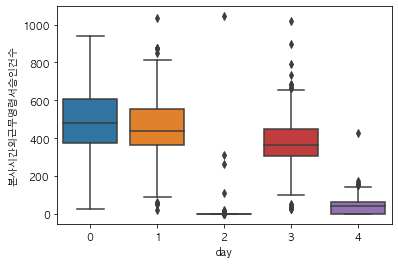

In [21]:
sns.boxplot(x=df['day'], y=df['본사시간외근무명령서승인건수'])

### 현본사소속재택근무자수

<AxesSubplot:ylabel='Frequency'>

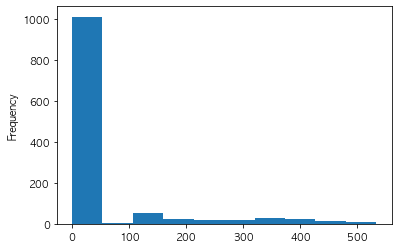

In [22]:
df['현본사소속재택근무자수'].plot(kind='hist')

In [23]:
df['현본사소속재택근무자수'].describe()

count    1205.000000
mean       43.506224
std       109.937400
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       533.000000
Name: 현본사소속재택근무자수, dtype: float64

1205 개의 일자중 988 개의 날짜에는 재택근무자가 없었다  
재택근무자수와 상관없이 중식계 석식계 값이 나타나는 것 같다...

In [24]:
len(df.loc[df['현본사소속재택근무자수']==0])

988

In [25]:
df.loc[df['현본사소속재택근무자수']==0].loc[:,['중식계', '석식계']]

,중식계,석식계
0,1039.0,331.0
1,867.0,560.0
2,1017.0,573.0
3,978.0,525.0
4,925.0,330.0
...,...,...
989,826.0,542.0
990,627.0,380.0
991,1282.0,767.0
992,1238.0,776.0


In [26]:
df.loc[df['현본사소속재택근무자수']==0].loc[:,['중식계', '석식계']].describe()

,중식계,석식계
count,988.000000,988.000000
mean,890.261134,469.058704
std,207.017031,139.490507
min,296.000000,0.000000
25%,760.000000,421.000000
50%,878.000000,492.000000
75%,1026.500000,550.000000
max,1459.000000,905.000000


In [27]:
df.loc[df['현본사소속재택근무자수']>0].loc[:,['중식계', '석식계']]

,중식계,석식계
958,1133.0,389.0
959,904.0,490.0
960,740.0,321.0
961,773.0,474.0
962,573.0,320.0
...,...,...
1200,1093.0,421.0
1201,832.0,353.0
1202,579.0,217.0
1203,1145.0,502.0


In [28]:
df.loc[df['현본사소속재택근무자수']>0].loc[:,['중식계', '석식계']].describe()

,중식계,석식계
count,217.000000,217.000000
mean,890.668203,428.599078
std,220.976998,133.100424
min,358.000000,0.000000
25%,746.000000,339.000000
50%,880.000000,424.000000
75%,1040.000000,501.000000
max,1405.000000,771.000000


<AxesSubplot:>

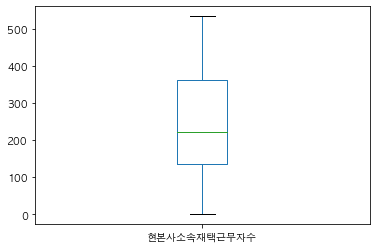

In [31]:
df['현본사소속재택근무자수'].loc[df['현본사소속재택근무자수'] > 0].plot(kind='box')

In [29]:
df.corr()

,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식계,석식계,day
본사정원수,1.000000,0.244666,-0.061688,0.146544,0.452293,-0.115529,-0.173852,-0.008577
본사휴가자수,0.244666,1.000000,-0.273318,-0.230789,0.065397,-0.391975,-0.316894,0.155578
본사출장자수,-0.061688,-0.273318,1.000000,-0.308757,-0.352643,-0.512680,-0.188164,0.532962
본사시간외근무명령서승인건수,0.146544,-0.230789,-0.308757,1.000000,0.156792,0.535611,0.571168,-0.554359
현본사소속재택근무자수,0.452293,0.065397,-0.352643,0.156792,1.000000,0.076509,-0.057534,-0.026795
중식계,-0.115529,-0.391975,-0.512680,0.535611,0.076509,1.000000,0.508287,-0.731563
석식계,-0.173852,-0.316894,-0.188164,0.571168,-0.057534,0.508287,1.000000,-0.312112
day,-0.008577,0.155578,0.532962,-0.554359,-0.026795,-0.731563,-0.312112,1.000000


/Users/nahyeonan/.local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/nahyeonan/.local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


<AxesSubplot:>

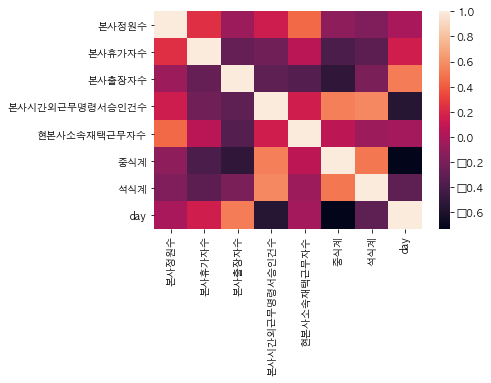

In [30]:
sns.heatmap(df.corr())

#### 정규화하여 csv로 다시 저장

In [32]:
df.head(1)

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계,day,morning_menu,lunch_menu,dinner_menu
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0,0,"[모닝롤, 찐빵, 우유, 두유, 주스, 계란후라이, 호두죽, 쌀밥, 된장찌개, 쥐어...","[쌀밥, 잡곡밥, 오징어찌개, 쇠불고기, 계란찜, 청포묵무침, 요구르트, 포기김치]","[쌀밥, 잡곡밥, 육개장, 자반고등어구이, 두부조림, 건파래무침, 포기김치]"


In [36]:
import numpy as np

In [39]:
features = ['본사정원수', '본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수', '현본사소속재택근무자수', 
            'day', 'morning_menu', 'lunch_menu', 'dinner_menu']
new_df = df[features]

In [38]:
np.std(df['본사정원수']), np.mean(df['본사정원수'])

(171.19332475356174, 2807.8157676348546)

In [40]:
numeric = ['본사정원수', '본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수', '현본사소속재택근무자수']

for col in numeric:
    new_df[col] -= np.mean(new_df[col])
    new_df[col] /= np.std(new_df[col])

/Users/nahyeonan/.local/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/nahyeonan/.local/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [41]:
new_df.head(2)

,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,day,morning_menu,lunch_menu,dinner_menu
0,-1.208083,-0.748721,-2.094550,-0.146735,-0.395901,0,"[모닝롤, 찐빵, 우유, 두유, 주스, 계란후라이, 호두죽, 쌀밥, 된장찌개, 쥐어...","[쌀밥, 잡곡밥, 오징어찌개, 쇠불고기, 계란찜, 청포묵무침, 요구르트, 포기김치]","[쌀밥, 잡곡밥, 육개장, 자반고등어구이, 두부조림, 건파래무침, 포기김치]"
1,-1.208083,-0.748721,-1.565987,0.182349,-0.395901,1,"[모닝롤, 단호박샌드, 우유, 두유, 주스, 계란후라이, 팥죽, 쌀밥, 호박젓국찌개...","[쌀밥, 잡곡밥, 김치찌개, 가자미튀김, 모둠소세지구이, 마늘쫑무침, 요구르트, 배...","[콩나물밥*양념장, 어묵국, 유산슬, 아삭고추무침, 바나나, 포기김치]"


In [44]:
new_df['중식계'] = df['중식계']
new_df['석식계'] = df['석식계']

/Users/nahyeonan/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/nahyeonan/.local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [45]:
new_df.describe()

,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,day,중식계,석식계
count,1.205000e+03,1.205000e+03,1.205000e+03,1.205000e+03,1.205000e+03,1205.000000,1205.000000,1205.000000
mean,5.343812e-17,6.956169e-17,-2.987007e-16,3.869657e-18,1.890972e-15,2.003320,890.334440,461.772614
std,1.000415e+00,1.000415e+00,1.000415e+00,1.000415e+00,1.000415e+00,1.415384,209.505057,139.179202
min,-1.208083e+00,-9.360509e-01,-4.599478e+00,-1.113675e+00,-3.959006e-01,0.000000,296.000000,0.000000
25%,-9.510638e-01,-6.030199e-01,-5.548240e-01,-1.097423e+00,-3.959006e-01,1.000000,758.000000,406.000000
50%,-2.793086e-01,-3.671229e-01,8.864368e-02,1.010939e-01,-3.959006e-01,2.000000,879.000000,483.000000
75%,9.006440e-01,1.879287e-01,7.091303e-01,7.226978e-01,-3.959006e-01,3.000000,1032.000000,545.000000
max,2.904227e+00,7.396662e+00,3.145115e+00,3.127858e+00,4.454326e+00,4.000000,1459.000000,905.000000


In [46]:
new_df.to_csv('preprocessed_01.csv')

## timestep, 주기 확인